In [51]:
#importing the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [52]:
df=pd.read_csv("C://Users//devam//OneDrive//Desktop//heart//heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [53]:
#checking the null values in each row
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [54]:
df.shape

(918, 12)

In [55]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [56]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [57]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

In [58]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [59]:
df.columns     

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [60]:
df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [61]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [62]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [63]:
#nothing can be ignored in these above columns

In [64]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

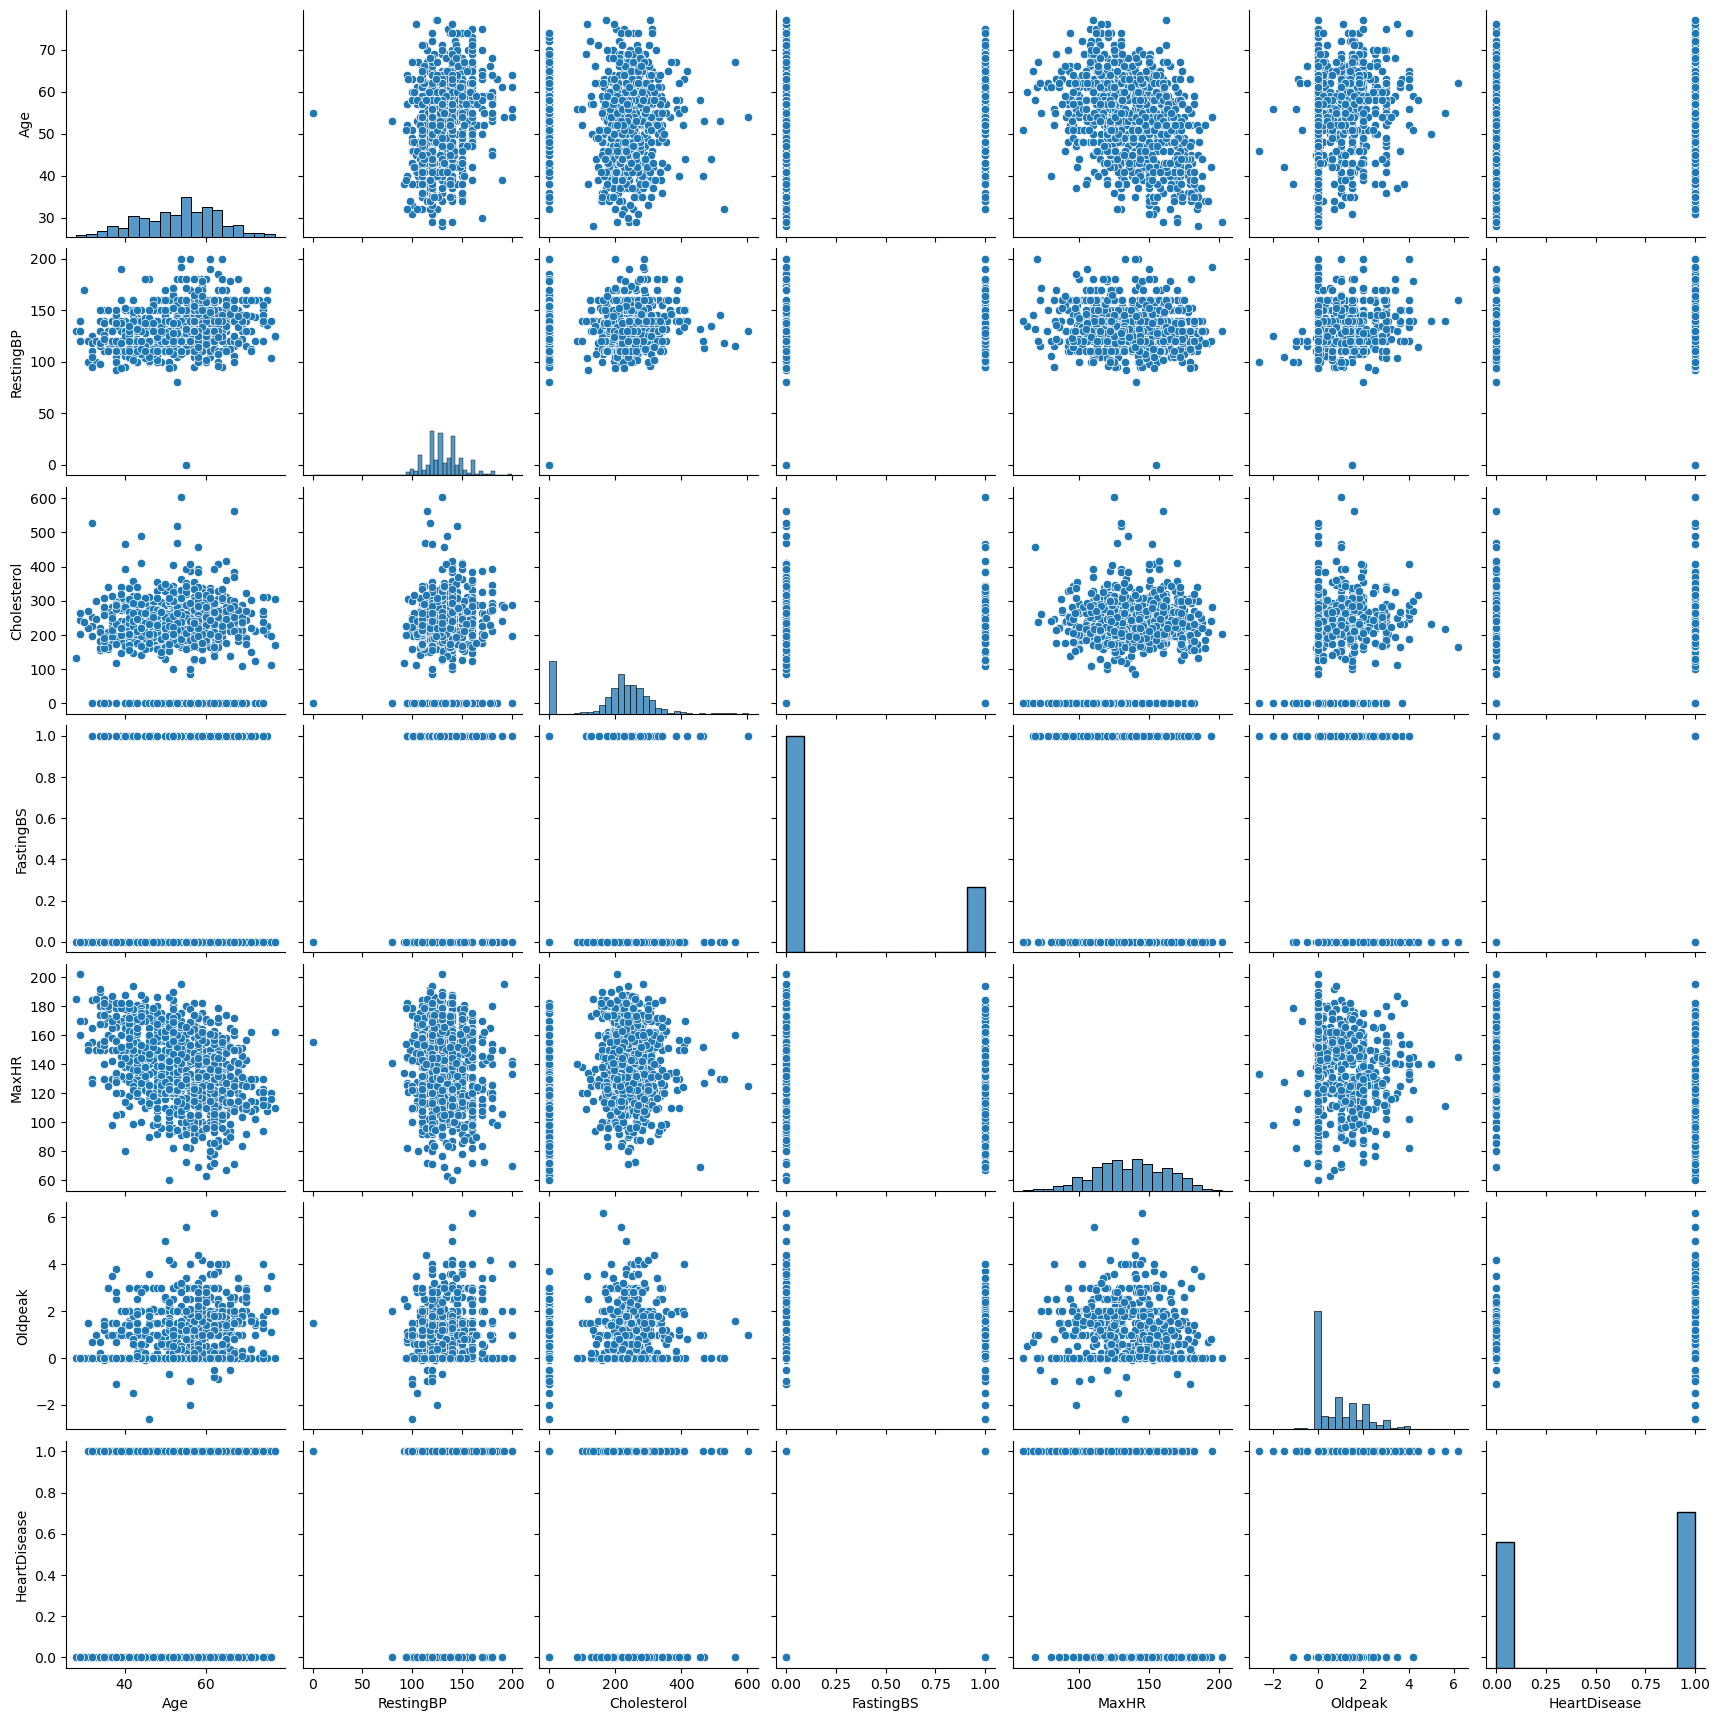

In [65]:
#
sns.pairplot(df)

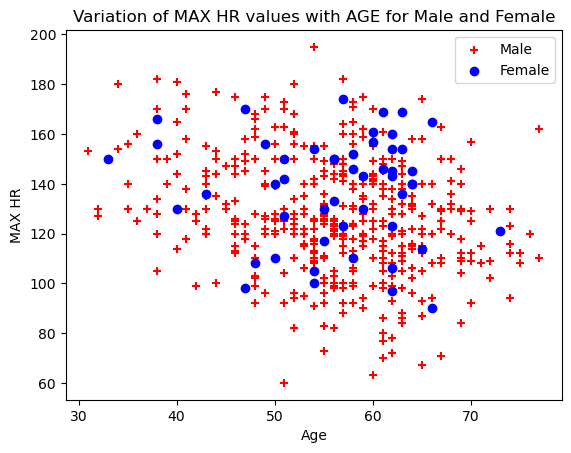

In [66]:
df_male_infected=df[(df.Sex=='M')&(df.HeartDisease==1)]
df_female_infected=df[(df.Sex=='F')&(df.HeartDisease==1)]
plt.scatter(df_male_infected['Age'],df_male_infected['MaxHR'],color='red',marker='+',label='Male')
plt.scatter(df_female_infected['Age'],df_female_infected['MaxHR'],color='blue',label='Female')
plt.xlabel('Age')
plt.ylabel('MAX HR')
plt.title('Variation of MAX HR values with AGE for Male and Female')
plt.legend()
plt.show()



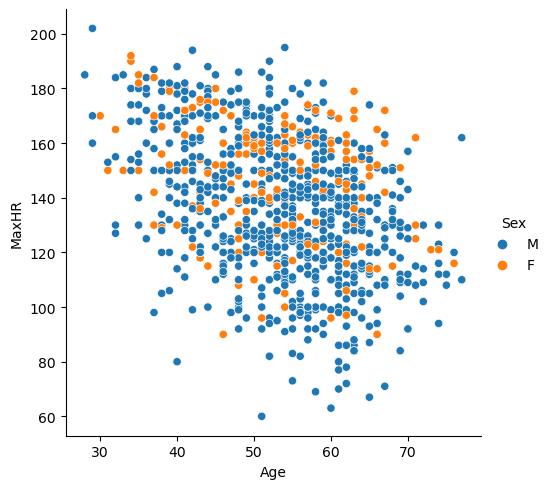

In [67]:
df_infected = df[df.HeartDisease==1]
sns.relplot(x='Age', y='MaxHR', hue = 'Sex', data=df)

In [68]:
#NOTE-- Males have generally higher and lower MAX HR values while females have moderate values

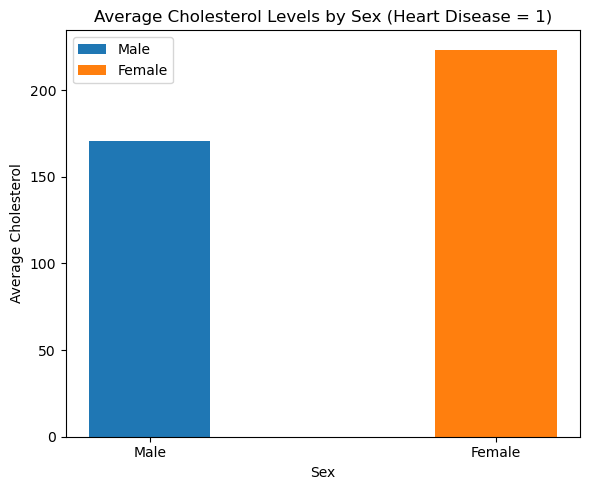

In [69]:
# Separate data for males and females (assuming 'Sex' is the gender column)
male_data = df_infected[df_infected['Sex'] == 'M']
female_data = df_infected[df_infected['Sex'] == 'F']

# Calculate average cholesterol for males and females
avg_cholesterol_male = male_data['Cholesterol'].mean()
avg_cholesterol_female = female_data['Cholesterol'].mean()

# Create a bar chart to visualize the averages
plt.figure(figsize=(6, 5))  # Adjust figure size for readability
bar_width = 0.35  # Adjust bar width for clarity

index = ['Male', 'Female']  # Category labels for the x-axis
male_bar = plt.bar(index[0], avg_cholesterol_male, bar_width, label='Male')
female_bar = plt.bar(index[1], avg_cholesterol_female, bar_width, label='Female')

# Customize the plot for clarity
plt.xlabel('Sex')
plt.ylabel('Average Cholesterol')
plt.title('Average Cholesterol Levels by Sex (Heart Disease = 1)')
plt.xticks(index, rotation=0)  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()  # Adjust spacing for better presentation

plt.show()

C:\Users\devam\AppData\Local\Temp\ipykernel_19000\3250265040.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Cholesterol'])
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Cholesterol', ylabel='Density'>

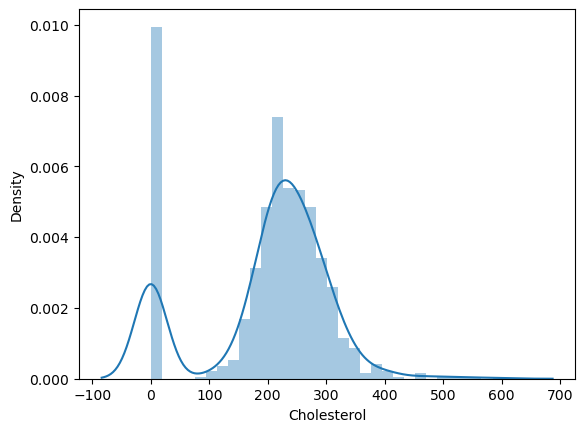

In [70]:
sns.distplot(df['Cholesterol'])

C:\Users\devam\AppData\Local\Temp\ipykernel_19000\3723947168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MaxHR'],bins=5)
C:\Users\devam\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MaxHR', ylabel='Density'>

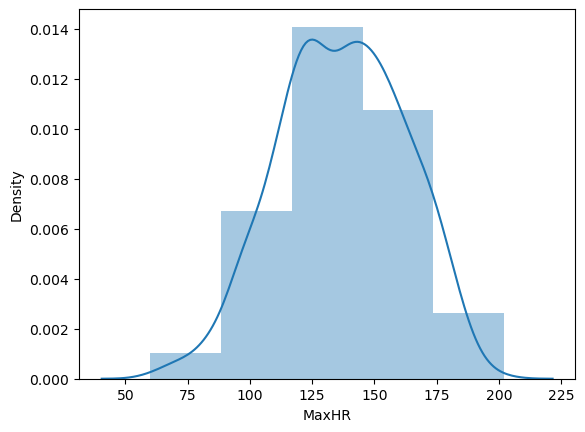

In [71]:
sns.distplot(df['MaxHR'],bins=5)

## Now I will use ZSCORE method for removing outliers if present

In [72]:
# Creating extra columns of zscore for ease to remove outliers...
df['zscore1']=(df.MaxHR - df.MaxHR.mean())/df.MaxHR.std()
df['zscore2']=(df.RestingBP - df.RestingBP.mean())/df.RestingBP.std()
df['zscore3']=(df.Cholesterol - df.Cholesterol.mean())/df.Cholesterol.std()

In [73]:
df[(df.zscore1<-3) | (df.zscore1>3)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore1,zscore2,zscore3
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1,-3.016825,0.410685,-1.817444


In [74]:
df[(df.zscore2<-3) | (df.zscore2>3)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore1,zscore2,zscore3
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,-1.210093,3.111322,0.385800
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,0.203871,3.651449,-0.007310
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1,0.125318,3.651449,-1.817444
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,-2.624057,3.651449,-1.817444
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,0.714469,-7.151097,-1.817444
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1,0.518086,3.111322,0.806337
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1,-0.149620,3.651449,0.815479
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1,2.285541,3.219347,0.769768


In [75]:
df[(df.zscore3<-3) | (df.zscore3>3)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore1,zscore2,zscore3
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1,-0.267450,-0.777595,3.018723
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1,-0.463834,-0.129442,3.695238
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0,0.910853,-0.939633,3.338696


In [76]:
#above rows are treated as outliers and need to be romve for better accuracy
df1=df[(df.zscore1>-3) & (df.zscore1<3)]
df2=df1[(df.zscore2>-3) & (df.zscore2<3)]
df3=df2[(df.zscore3>-3) & (df.zscore3<3)]
df3.head()

C:\Users\devam\AppData\Local\Temp\ipykernel_19000\744963142.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2=df1[(df.zscore2>-3) & (df.zscore2<3)]
C:\Users\devam\AppData\Local\Temp\ipykernel_19000\744963142.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3=df2[(df.zscore3>-3) & (df.zscore3<3)]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore1,zscore2,zscore3
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.382175,0.410685,0.824621
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.753746,1.490940,-0.171867
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,-1.524307,-0.129442,0.769768
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,-1.131539,0.302660,0.138964
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.581664,0.950812,-0.034736


In [77]:
df3[(df3.zscore1<-3) | (df3.zscore2<-3) | (df3.zscore3)<-3]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore1,zscore2,zscore3


In [78]:
df3[(df3.zscore1>3) | (df3.zscore2>3) | (df3.zscore3)>3]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,zscore1,zscore2,zscore3


In [79]:
#Hence outliers removed and now we can drop the zscores columns
df4 = df3.drop(['zscore1', 'zscore2', 'zscore3'],axis = 'columns')
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [80]:
df4.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          63
Cholesterol       219
FastingBS           2
RestingECG          3
MaxHR             116
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [81]:
#Encoding on Sex(2), RestingECG(3), ST_Slope(3)
#LabelEncoding can only done on Sex column and dummy variables on other
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df4['Sex'] = le.fit_transform(df4.Sex)
# df4['ExerciseAngina'] = le.fit_transform(df.ExerciseAngina)
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [82]:
df.ExerciseAngina.unique()


array(['N', 'Y'], dtype=object)

In [83]:
df4['ExerciseAngina'] = le.fit_transform(df4.ExerciseAngina)
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0


In [84]:
#OneHotEncoding for RestingECG, ChestPainType and LabelEncoding for  ST_Slope
#for OHE we have to perform LabelEncoder on both

df4.ST_Slope = le.fit_transform(df4.ST_Slope)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,2,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,1,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,2,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,1,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,2,0


In [85]:
dummies1 = pd.get_dummies(df4['RestingECG']).astype('int')
dummies2 = pd.get_dummies(df4['ChestPainType']).astype('int')
dummies2

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [86]:

dummies1

,LVH,Normal,ST
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
913,0,1,0
914,0,1,0
915,0,1,0
916,1,0,0


In [87]:
dummies = pd.concat([dummies1,dummies2],axis=1)
dummies

,LVH,Normal,ST,ASY,ATA,NAP,TA
0,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0
3,0,1,0,1,0,0,0
4,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...
913,0,1,0,0,0,0,1
914,0,1,0,1,0,0,0
915,0,1,0,1,0,0,0
916,1,0,0,0,1,0,0


In [88]:
df5 = pd.concat([df4,dummies],axis=1)
df5.shape

(906, 19)

In [89]:
df6 = df5.drop(['ST', 'TA', 'RestingECG', 'ChestPainType'], axis = 'columns')
df6.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,LVH,Normal,ASY,ATA,NAP
0,40,1,140,289,0,172,0,0.0,2,0,0,1,0,1,0
1,49,0,160,180,0,156,0,1.0,1,1,0,1,0,0,1
2,37,1,130,283,0,98,0,0.0,2,0,0,0,0,1,0
3,48,0,138,214,0,108,1,1.5,1,1,0,1,1,0,0
4,54,1,150,195,0,122,0,0.0,2,0,0,1,0,0,1


In [90]:
df_inputs = df6.drop(['HeartDisease'], axis = 'columns')
df_inputs.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,LVH,Normal,ASY,ATA,NAP
0,40,1,140,289,0,172,0,0.0,2,0,1,0,1,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,0,1
2,37,1,130,283,0,98,0,0.0,2,0,0,0,1,0
3,48,0,138,214,0,108,1,1.5,1,0,1,1,0,0
4,54,1,150,195,0,122,0,0.0,2,0,1,0,0,1


In [91]:
target = df6.HeartDisease
target

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 906, dtype: int64

### Now, all the columns are handled accordingly...proceeding to divide the data into train and test->


In [92]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(df_inputs, target, test_size = 0.25)

In [93]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
model_D = DecisionTreeClassifier()
model_svm = SVC()
model_svm.fit(X_train, y_train)
model_D.fit(X_train,y_train)

DecisionTreeClassifier()

In [94]:
model_svm.score(X_test, y_test)

0.6828193832599119

In [95]:
model_D.score(X_test,y_test)

0.7797356828193832

In [96]:
s1 = cross_val_score(SVC(),df_inputs,target,cv=10)
s1

array([0.61538462, 0.68131868, 0.81318681, 0.83516484, 0.72527473,
       0.67032967, 0.78888889, 0.7       , 0.63333333, 0.6       ])

In [97]:
s1.mean()

0.7062881562881562

In [98]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs', max_iter = 1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.8105726872246696

In [120]:
S2 = cross_val_score(LogisticRegression(max_iter = 1000),df_inputs,target,cv=10)
S2

array([0.79120879, 0.92307692, 0.86813187, 0.87912088, 0.84615385,
       0.8021978 , 0.86666667, 0.78888889, 0.74444444, 0.8       ])

In [121]:
S2.mean()

0.830989010989011

# So for Best Model I am going to use GridSeacrhCV :

In [122]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'solver': ['lbfgs', 'liblinear'],
                'C': [0.01, 0.1, 1, 10, 100],
                'max_iter': [100, 200, 500]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5]
            }
        },
        'svc': {
            'model': SVC(),
            'params': {
                'kernel': ['linear', 'rbf'],
                'C': [0.01, 0.1, 1, 10, 100],
                'gamma': ['scale', 'auto']
            }
        },
        'knn': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['gini', 'entropy'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Example usage:
# df = pd.read_csv('data.csv')
# X = df.drop('target', axis=1)
# y = df['target']
# best_models = find_best_model_using_gridsearchcv(X, y)
# print(best_models)

import warnings
warnings.filterwarnings('ignore')


In [123]:
X = df_inputs
y = target
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,logistic_regression,0.838462,"{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}"
1,random_forest,0.871429,"{'max_depth': None, 'min_samples_leaf': 1, 'mi..."
2,gradient_boosting,0.865934,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
3,svc,0.842857,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}"
4,knn,0.732967,"{'metric': 'manhattan', 'n_neighbors': 7, 'wei..."
5,decision_tree,0.827473,"{'criterion': 'entropy', 'max_depth': 10, 'spl..."


In [117]:
RF_classifier = RandomForestClassifier(max_depth = 9, min_samples_leaf = 9)
RF_classifier

RandomForestClassifier(max_depth=9, min_samples_leaf=9)

In [118]:
RF_classifier.fit(X_train, y_train)
RF_classifier.score(X_test,y_test)

0.8502202643171806

# So the best accuracy I got is 88.10% for Random Forest Classifier...

In [1119]:
df_inputs.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'LVH', 'Normal', 'ASY', 'ATA',
       'NAP'],
      dtype='object')

In [50]:
import numpy as np


#I will use the follwing 
X = df_inputs
def predict_heart_disease(age, sex, resting_bp, cholesterol, fasting_bs, max_hr, exercise_angina, oldpeak, st_slope, lvh, normal, asy, ata, nap):
   
    x = np.zeros(len(X.columns))
    
    # Assign values to the features
    x[0] = age
    x[1] = sex
    x[2] = resting_bp
    x[3] = cholesterol
    x[4] = fasting_bs
    x[5] = max_hr
    x[6] = exercise_angina
    x[7] = oldpeak
    x[8] = st_slope
    x[9] = lvh
    x[10] = normal
    x[11] = asy
    x[12] = ata
    x[13] = nap
    
    # Predict whether the patient has heart disease
    return RF_classifier.predict([x])[0]


NameError: name 'df_inputs' is not defined